# ------------------------------SVM Task----------------------------------

## libraries importing 

In [167]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## shuffling function

In [168]:
#Not used because i used the random state in train_test_split

def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

## load data

In [169]:
df1=pd.read_csv('positive.dat',sep="\s+",index_col=0,header=None)
for c in df1.columns.values:
    df1[c] = df1[c].apply(lambda x: float(str(x).split(':')[1]))
df2=pd.read_csv('negative.dat',sep="\s+",index_col=0,header=None)
for c in df2.columns.values:
    df2[c] = df2[c].apply(lambda x: float(str(x).split(':')[1]))
#df2.tail()
frames = [df1, df2]
result_df = pd.concat(frames)
result_df

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
1,-0.435298,-0.538602,-9.401395,2.282358,0.467554,-4.655254,2.592685,4.457380,-13.362630,-4.185858,...,10.200600,10.765630,-3.518332,3.643454,1.771338,5.155323,-0.201008,-0.585196,8.983210,5.456460
1,1.912942,-11.208570,1.610712,-7.747005,3.786808,6.374994,-5.350169,-0.126560,-5.693944,7.006273,...,-2.069554,1.542221,-6.087274,7.559115,3.935657,-8.199338,6.974332,6.306189,-2.471169,-2.061228
1,5.897088,5.999105,-7.531619,4.056021,-5.932660,-0.647524,-7.798974,-9.536466,8.560540,4.360957,...,-2.638064,-2.550763,6.675256,4.601664,-4.600989,9.722222,8.883898,2.514181,-1.126475,-17.562190
1,15.592950,-0.093184,-6.866995,4.628330,-10.680960,5.621610,9.534383,8.213895,-10.483550,6.944374,...,-5.929262,0.489708,8.019210,12.223580,3.109499,6.980562,9.161245,-3.903404,6.825863,3.313812
1,1.234218,-2.637812,23.040220,10.372090,5.713188,-1.980758,-0.300838,6.167769,2.798716,11.084750,...,2.501338,-9.814216,-0.237088,-4.137264,0.509947,-7.609169,-7.571899,0.018865,-16.908430,6.109299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,-4.734496,12.180270,-0.985647,-0.036533,3.026102,8.196070,-3.047794,-4.254242,-2.903686,7.444707,...,-1.256349,-10.370470,-5.268663,12.043680,-5.422183,-4.628615,14.214270,-1.188761,-5.910715,-12.387830
-1,-0.500554,2.316130,-0.596127,6.876940,-2.019650,13.607870,-4.566432,1.609356,-7.155031,-8.618190,...,-0.121615,6.637618,-4.348457,0.490303,5.480975,-8.163212,3.166192,-3.078238,0.066750,5.723327
-1,7.624658,-1.395110,-3.487807,6.589860,8.778849,6.405326,-9.256895,-12.848770,4.668293,7.350127,...,-7.576569,7.547803,-8.511807,0.077039,2.374087,-11.083120,8.842909,-0.829944,-10.648250,1.849014


## separating into X,y

In [172]:
X=np.asarray(result_df)
s=(5000)
y1=np.ones(s)
y2=np.ones(s)*-1
y=np.concatenate((y1, y2))
# X1,y1=shuffle_in_unison(X, y)
# print(X1,X1.shape)
# print(y1,y1.shape)

## divide the data as train and test

In [173]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)

## Minimum test error  

In [174]:
classifier=svm.SVC(kernel='poly',gamma=0.0004,C=0.1).fit(X_train,y_train)
#classifier.fit(X_train, y_train).score(X_train, y_train)
y_predict_test=classifier.predict(X_test)
y_predict_train=classifier.predict(X_train)
classifier.score(X_test,y_test)

0.838

In [175]:
classifier.score(X_train,y_train)

0.8886

In [176]:
#results
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

        -1.0       0.85      0.83      0.84      2518
         1.0       0.83      0.85      0.84      2482

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

              precision    recall  f1-score   support

        -1.0       0.89      0.88      0.89      2482
         1.0       0.89      0.89      0.89      2518

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## plotting test accuracy for different training set size

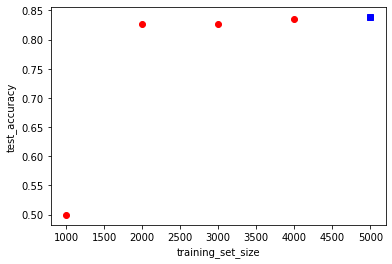

In [177]:
testt_size=[0.9,0.8,0.7,0.6,0.5]
training_size=[1000,2000,3000,4000,5000]
test_accuracy=[]
for i in range (5):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=testt_size[i],random_state=0)
    classifier=svm.SVC(kernel='poly',gamma=0.0004,C=0.1).fit(X_train,y_train)
    test_accuracy.append(classifier.score(X_test,y_test))
index_max_accuracy = max(range(len(test_accuracy)), key=test_accuracy.__getitem__)
plt.plot(training_size,test_accuracy,'ro')

#max test accuracy will be in blue and the other points in red

plt.plot(training_size[index_max_accuracy],test_accuracy[index_max_accuracy],'bs')
plt.ylabel('test_accuracy')
plt.xlabel('training_set_size')
plt.show()

## plotting training accuracy for different training set size

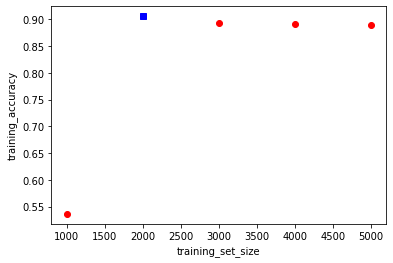

In [178]:
testt_size=[0.9,0.8,0.7,0.6,0.5]
training_size=[1000,2000,3000,4000,5000]
training_accuracy=[]
for i in range (5):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=testt_size[i],random_state=0)
    classifier=svm.SVC(kernel='poly',gamma=0.0004,C=0.1).fit(X_train,y_train)
    training_accuracy.append(classifier.score(X_train,y_train))
index_max_accuracy = max(range(len(training_accuracy)), key=training_accuracy.__getitem__)
plt.plot(training_size,training_accuracy,'ro')

#max training accuracy will be in blue and the other points in red

plt.plot(training_size[index_max_accuracy],training_accuracy[index_max_accuracy],'bs')
plt.ylabel('training_accuracy')
plt.xlabel('training_set_size')
plt.show()

## Changing  Parameter "C"

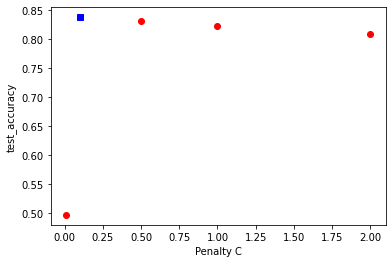

In [179]:
C=[0.5,0.01,0.1,1,2]
test_accuracy=[]
for i in range (5):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
    classifier=svm.SVC(kernel='poly',gamma=0.0004,C=C[i]).fit(X_train,y_train)
    test_accuracy.append(classifier.score(X_test,y_test))
plt.plot(C,test_accuracy,'ro')
index_max_accuracy = max(range(len(test_accuracy)), key=test_accuracy.__getitem__)

#max test accuracy will be in blue and the other points in red

plt.plot(C[index_max_accuracy],test_accuracy[index_max_accuracy],'bs')
plt.ylabel('test_accuracy')
plt.xlabel('Penalty C')
plt.show()

## Changing Parameter "gamma"

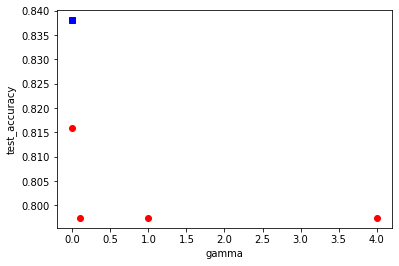

In [180]:
gamma=[0.0004,0.001,0.1,1,4]
test_accuracy=[]
for i in range (5):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
    classifier=svm.SVC(kernel='poly',gamma=gamma[i],C=0.1).fit(X_train,y_train)
    test_accuracy.append(classifier.score(X_test,y_test))
plt.plot(gamma,test_accuracy,'ro')
index_max_accuracy = max(range(len(test_accuracy)), key=test_accuracy.__getitem__)

#max test accuracy will be in blue and the other points in red

plt.plot(gamma[index_max_accuracy],test_accuracy[index_max_accuracy],'bs')
plt.ylabel('test_accuracy')
plt.xlabel('gamma')
plt.show()